In [1]:
import os
import pandas as pd
import numpy as np

FILES_DIR = "/home/blagojce/EPFL_semester3/NTDS/project/ml-100k"

<b>u.data</b>    -- The full u data set, 100000 ratings by 943 users on 1682 items.
              Each user has rated at least 20 movies.  Users and items are
              numbered consecutively from 1.  The data is randomly
              ordered. This is a tab separated list of 
	         user id | item id | rating | timestamp. 
              The time stamps are unix seconds since 1/1/1970 UTC 

In [2]:
df_data_path = os.path.join(FILES_DIR, "u.data")
df_data = pd.read_csv(df_data_path, header=None, delimiter="\t")
df_data.columns = ["user_id", "item_id", "rating", "timestamp"]
df_data["timestamp"] = pd.to_datetime(df_data["timestamp"], unit='s')

In [3]:
print("Unique users: %d" % len(df_data["user_id"].unique()))
print("Unique movies: %d" % len(df_data["item_id"].unique()))
print("Distinct ratings: %s" % sorted(df_data["rating"].unique()))

Unique users: 943
Unique movies: 1682
Distinct ratings: [1, 2, 3, 4, 5]


In [4]:
df_data["rating"].hist()

<b>u.info</b> <b>USELESS</b>     -- The number of users, items, and ratings in the u data set.

In [5]:
df_info_path = os.path.join(FILES_DIR, "u.info")
df_info = pd.read_csv(df_info_path, header=None, delimiter="\t")

In [6]:
df_info

,0
0,943 users
1,1682 items
2,100000 ratings


<b>u.item</b>     -- Information about the items (movies); this is a tab separated
              list of
              movie id | movie title | release date | video release date |
              IMDb URL | unknown | Action | Adventure | Animation |
              Children's | Comedy | Crime | Documentary | Drama | Fantasy |
              Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
              Thriller | War | Western |
              The last 19 fields are the genres, a 1 indicates the movie
              is of that genre, a 0 indicates it is not; movies can be in
              several genres at once.
              The movie ids are the ones used in the u.data data set.


In [7]:
df_item_path = os.path.join(FILES_DIR, "u.item")
df_item = pd.read_csv(df_item_path, header=None, delimiter="|", encoding='latin1')
df_item.columns = ["item_id" , "movie_title" , "release_date" , "video_release_date" , "IMDb_URL" , "unknown" , "Action" , "Adventure" , "Animation" , "Children's" , "Comedy" , "Crime" , "Documentary" , "Drama" , "Fantasy" , "Film-Noir" , "Horror" , "Musical" , "Mystery" , "Romance" , "Sci-Fi" , "Thriller" , "War" , "Western"]
df_item = df_item.drop(columns= ["video_release_date"]) # evey value is NaN

In [8]:
df_item.head()

,item_id,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<b>u.genre</b>    -- A list of the genres.

In [9]:
df_genre_path = os.path.join(FILES_DIR, "u.genre")
df_genre = pd.read_csv(df_genre_path, header=None, delimiter="|")
df_genre

,0,1
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


<b>u.user</b>     -- Demographic information about the users; this is a tab
              separated list of
              user id | age | gender | occupation | zip code
              The user ids are the ones used in the u.data data set.

In [10]:
df_user_path = os.path.join(FILES_DIR, "u.user")
df_user = pd.read_csv(df_user_path, header=None, delimiter="|")
df_user.columns = ["user_id", "age", "gendre", "occupation", "zip_code"]
df_user.head()

,user_id,age,gendre,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


<b>COMMENT</b> Only thing we could do with the user data is to aggregate the zip_codes, instead of zip_codes, to find cities or states, and use them as additional simmilarity information in the users graph. And, also merge the occupation none with occupation other?

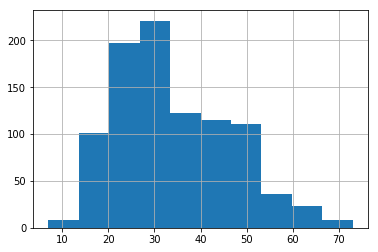

In [11]:
df_user["age"].hist()

<b>u.occupation</b> -- A list of the occupations.

In [12]:
df_occupation_path = os.path.join(FILES_DIR, "u.occupation")
df_occupation = pd.read_csv(df_occupation_path, header=None, delimiter="|")
df_occupation

,0
0,administrator
1,artist
2,doctor
3,educator
4,engineer
5,entertainment
6,executive
7,healthcare
8,homemaker
9,lawyer


<b>To je to</b> There are some already done train/test splits in the data directory, like for 5 fold cross validadtion, etc.